<a href="https://colab.research.google.com/github/hamyat/machine_learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LATIHAN LOGISTIC REGRESSION**

Latihan diambil dari Buku Pengenalan Machine Learning dengan Python 
karya Dios Kurniawan 
[Link Buku](https://books.google.co.id/books?id=ZutsEAAAQBAJ&pg=PR3&dq=dios+kurniawan&hl=en&newbks=1&newbks_redir=1&sa=X&ved=2ahUKEwjZk4-3_eT-AhWIwjgGHan-BVsQ6AF6BAgHEAI)

In [2]:
# konversi program data science ke versi google colab
# belajar dari @budiraharjo
# akses ke google drive kita
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# import library pandas dan baca file dari Google Drive
import pandas as pd
df1 = pd.read_csv('/content/gdrive/My Drive/dataset/calonpembelimobil.csv')
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [6]:
df1 = df1[df1['Usia'] <= 100]

In [ ]:
# Memeriksa data yang kosong
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [7]:
# Menghitung jumlah data pada kolom Beli_Mobil
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [ ]:
import sklearn.model_selection as ms
X=df1[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y=df1.Beli_Mobil
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.coef_)

[[-0.01594363 -0.17093161 -1.03941674  0.07720416  0.05686701]]


In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [ ]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [ ]:
y_test.head(3)

272    1
727    0
31     0
Name: Beli_Mobil, dtype: int64

In [ ]:
import sklearn.metrics as met
confusionmatrix = met.confusion_matrix(y_test, y_prediksi)
print(confusionmatrix)

[[ 59   4]
 [  5 132]]


In [ ]:
score = model.score(X_test, y_test)
print(score)

0.955


In [ ]:
precision = met.precision_score(y_test, y_prediksi)
print(precision)

0.9705882352941176


In [ ]:
59/64

0.921875

In [ ]:
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.9500057930714866


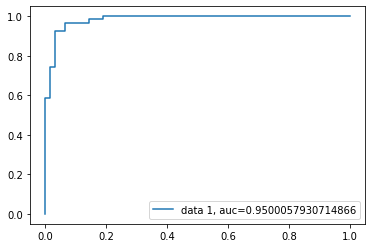

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import sklearn.feature_selection as fs
rfe = fs.RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
print('Support=', rfe.support_)
print('Ranking=', rfe.ranking_)

Support= [False  True  True False  True]
Ranking= [3 1 1 2 1]
